In [4]:
import json
from matplotlib import pyplot as plt

In [2]:
def load_data(filename):
    with open(filename) as input_file:
        return json.load(input_file)

In [5]:
controller_data = load_data('data/line-following-controller-data-17-07-2021-21.10.13.json')

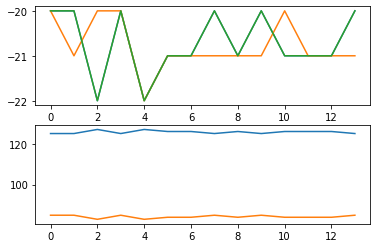

In [25]:
error = [controller_data[x]['data']['controller']['state']['error'] for x in range(len(controller_data))]
previous_error = [controller_data[x]['data']['controller']['state']['previousError'] for x in range(len(controller_data))]
control_output = [controller_data[x]['data']['controller']['state']['controlOutput'] for x in range(len(controller_data))]
left_motor_velocity = [controller_data[x]['data']['controller']['state']['leftMotorVelocity'] for x in range(len(controller_data))]
right_motor_velocity = [controller_data[x]['data']['controller']['state']['rightMotorVelocity'] for x in range(len(controller_data))]

fig, axs = plt.subplots(2)
axs[0].plot(error)
axs[0].plot(previous_error)
axs[0].plot(control_output)
axs[1].plot(left_motor_velocity)
axs[1].plot(right_motor_velocity)

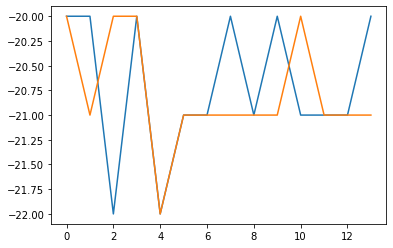